In [1]:
!pip install spacy
!pip install penman


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import penman 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muppa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muppa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
proj_lines = [i.strip() for i in open("projs.txt", "r").readlines()]
vectorizer = TfidfVectorizer()
vect = vectorizer.fit_transform(proj_lines)
print(vectorizer.get_feature_names())
print(vect.toarray())

['10', '2022', 'analysis', 'and', 'ann', 'answer', 'answering', 'application', 'arizona', 'artical', 'artificial', 'aspect', 'asr', 'automatic', 'banks', 'based', 'captioning', 'carolina', 'cell', 'chatbot', 'conditions', 'connection', 'created', 'crime', 'crisis', 'damaged', 'data', 'dataset', 'detecting', 'diabetes', 'doc', 'doctor', 'election', 'elections', 'entity', 'events', 'evolving', 'extracting', 'faq', 'fasttext', 'firearm', 'foods', 'for', 'from', 'gubernatorial', 'image', 'improve', 'in', 'mississippi', 'models', 'neighborhoods', 'networks', 'neural', 'new', 'nlp', 'novel', 'of', 'on', 'one', 'ones', 'ongoing', 'perovskite', 'predicting', 'prediction', 'procedure', 'publications', 'quesries', 'question', 'rating', 'recognition', 'recommendation', 'regarding', 'regulation', 'regulations', 'scientific', 'sentiment', 'services', 'severity', 'short', 'solar', 'south', 'specialist', 'speech', 'state', 'summarization', 'summary', 'synthesis', 'system', 'target', 'techniques', 'te

In [5]:
proj_lines

['Water - South Carolina',
 'Evolving Firearm Regulations',
 'Crime analysis in South Carolina',
 'Target aspect based sentiment analysis for urban neighborhoods',
 'Extracting synthesis procedure from solar cell perovskite based scientific publications.',
 'Entity Recognition : Water Data Regulations',
 "TOS: Banks' Terms of Services summary",
 'Water Regulation Summarization',
 'Predicting the 2022 gubernatorial election of South Carolina using sentiment analysis of Twitter.',
 'Scientific Artical Summarization',
 'New FastText [with Election data]',
 'Chatbot to answer quesries regarding WHO Water Regulations',
 'Verifying various foods connection to improve diabetes using NLP techniques',
 'Summarization of Terms and conditions',
 'Chatbot for Elections FAQ - State of Mississippi',
 'Image Captioning using Transformer Models',
 'Specialist Doctor Recommendation System',
 'Application of Artificial Neural Networks (ANN) to Automatic Speech Recognition (ASR) on a Novel Dataset create

In [6]:
myproj = proj_lines[11]
myproj

'Chatbot to answer quesries regarding WHO Water Regulations'

In [7]:
for i in range(0, len(proj_lines)):
    print (f"My project's ({myproj}) similarity score with {i+1} ({proj_lines[i]}) is: {str(cosine_similarity(vect[11], vect[i]))}")

My project's (Chatbot to answer quesries regarding WHO Water Regulations) similarity score with 1 (Water - South Carolina) is: [[0.13874741]]
My project's (Chatbot to answer quesries regarding WHO Water Regulations) similarity score with 2 (Evolving Firearm Regulations) is: [[0.13340843]]
My project's (Chatbot to answer quesries regarding WHO Water Regulations) similarity score with 3 (Crime analysis in South Carolina) is: [[0.]]
My project's (Chatbot to answer quesries regarding WHO Water Regulations) similarity score with 4 (Target aspect based sentiment analysis for urban neighborhoods) is: [[0.]]
My project's (Chatbot to answer quesries regarding WHO Water Regulations) similarity score with 5 (Extracting synthesis procedure from solar cell perovskite based scientific publications.) is: [[0.]]
My project's (Chatbot to answer quesries regarding WHO Water Regulations) similarity score with 6 (Entity Recognition : Water Data Regulations) is: [[0.2096724]]
My project's (Chatbot to answe

<AxesSubplot:>

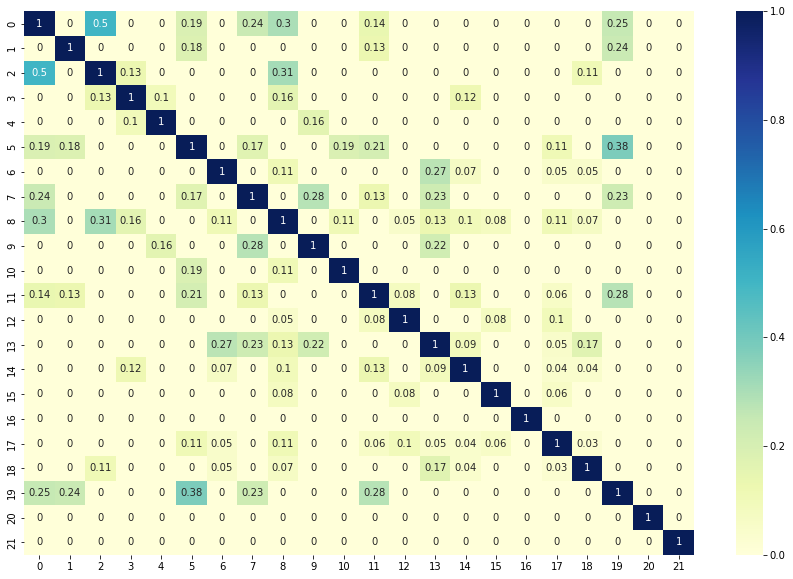

In [30]:
sim_mat = []
for i in range(len(proj_lines)):
    temp = []
    for j in range(len(proj_lines)):
        temp.append(round(cosine_similarity(vect[i], vect[j])[0][0],2) )
    sim_mat.append(temp)

# visualize sim_mat in 2d format
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(sim_mat, annot=True, cmap="YlGnBu")

In [ ]:
from tika import parser
def convertPdf2TxtWithTika(in_pdf_file, out_text_file):
    # Load a file and extract information
    print ("INFO: - reading file = " + in_pdf_file)
    
    raw = parser.from_file(in_pdf_file)
    text = raw['content']
    
    ## Post-processing explained at: 
    # https://medium.com/@justinboylantoomey/fast-text-extraction-with-python-and-tika-41ac34b0fe61
    # Convert to string
    text = str(text)
    # Ensure text is utf-8 formatted
    safe_text = text.encode('utf-8', errors='ignore')
    # Escape any \ issues
    safe_text = str(safe_text).replace('\\', '\\\\').replace('"', '\\"')
    
    # Write out extracted content
    text_pdf = open(out_text_file, 'w', encoding="utf-8")
    print ("INFO: - writing file = " + out_text_file)
    text_pdf.write(text)
    text_pdf.close()

In [ ]:
convertPdf2TxtWithTika("Resume.pdf", "Resume.txt")
var = open("Resume.txt", "r").read()
texts = var.split("\n")
texts = [i for i in texts if len(i)>2]
corpus2 = [nltk.word_tokenize(i) for i in texts]

In [ ]:
# train model
model = Word2Vec(corpus2, min_count=1)
# summarize the loaded model
print("INFO: Model - \n" + str(model))

In [ ]:
# summarize vocabulary
words = list(model.wv.index_to_key)
print("INFO: Words found - \n" + str(words))

In [ ]:
X = model[model.wv.vocab]

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [ ]:
# Plot the points
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [4]:
stog = amrlib.load_stog_model(model_dir="C:\\users\\khved\\anaconda3\\envs\\nlpf22\\lib\\site-packages\\amrlib\\data\\model_stog\\model_parse_xfm_bart_large-v0_1_0")

c:\Users\khved\anaconda3\envs\nlpf22\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: 100%|██████████| 26.0/26.0 [00:00<00:00, 12.8kB/s]
c:\Users\khved\anaconda3\envs\nlpf22\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\khved\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an admin

In [5]:
graphs = stog.parse_sents(['show me flights from Boston to anywhere that has flights to Dallas'])
for graph in graphs:
    print(graph)

# ::snt show me flights from Boston to anywhere that has flights to Dallas
(s / show-01
      :mode imperative
      :ARG0 (y / you)
      :ARG1 (f / fly-01
            :source (c / city
                  :name (n / name
                        :op1 "Boston"))
            :destination (a / anywhere
                  :ARG0-of (h / have-03
                        :ARG1 (f2 / fly-01
                              :destination (c2 / city
                                    :name (n2 / name
                                          :op1 "Dallas"))))))
      :ARG2 (ii / i))


In [6]:

g = penman.decode("""(s / show-01
      :mode imperative
      :ARG0 (y / you)
      :ARG1 (f / fly-01
            :source (c / city
                  :name (n / name
                        :op1 "Boston"))
            :destination (a / anywhere
                  :ARG0-of (h / have-03
                        :ARG1 (f2 / fly-01
                              :destination (c2 / city
                                    :name (n2 / name
                                          :op1 "Dallas"))))))
      :ARG2 (ii / i))""")

In [7]:
g.triples

[('s', ':instance', 'show-01'),
 ('s', ':mode', 'imperative'),
 ('s', ':ARG0', 'y'),
 ('y', ':instance', 'you'),
 ('s', ':ARG1', 'f'),
 ('f', ':instance', 'fly-01'),
 ('f', ':source', 'c'),
 ('c', ':instance', 'city'),
 ('c', ':name', 'n'),
 ('n', ':instance', 'name'),
 ('n', ':op1', '"Boston"'),
 ('f', ':destination', 'a'),
 ('a', ':instance', 'anywhere'),
 ('h', ':ARG0', 'a'),
 ('h', ':instance', 'have-03'),
 ('h', ':ARG1', 'f2'),
 ('f2', ':instance', 'fly-01'),
 ('f2', ':destination', 'c2'),
 ('c2', ':instance', 'city'),
 ('c2', ':name', 'n2'),
 ('n2', ':instance', 'name'),
 ('n2', ':op1', '"Dallas"'),
 ('s', ':ARG2', 'ii'),
 ('ii', ':instance', 'i')]